In [1]:
#importing the necessary libraries
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.linalg import eigh
from sklearn.decomposition import PCA

In [2]:
#fetching the dataset
data = datasets.fetch_olivetti_faces()
data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

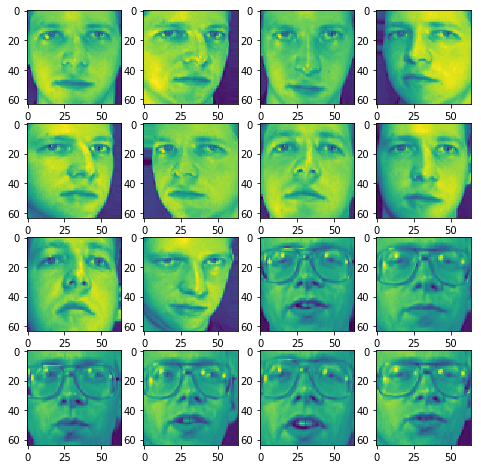

In [3]:
#displaying first 16 images
fig = plt.figure(figsize = (8,8))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(data['images'][i])
plt.show()

In [4]:
X = data['data']
Y = data['target']

#column standardization is necessary before PCA
standardized_data = StandardScaler().fit_transform(X)

# applying pca from scratch

In [5]:
#covariance matrix is generated to find eigen values and eigen vectors
covariance_matrix = np.matmul(standardized_data.T, standardized_data)
covariance_matrix.shape

(4096, 4096)

In [6]:
#finding the eigen values and eigen vectors 
eig_vals, eig_vectors = eigh(covariance_matrix)

#intially eigen vectors are row vectors , we convert them into column vectors 
eig_vectors = eig_vectors.T

eig_vectors.shape, eig_vals.shape

((4096, 4096), (4096,))

In [7]:
#we sort the eigen values in descending order to find the top k features which expain the most of the variance
eig_vals = sorted(eig_vals, reverse = True)

In [8]:
#finding the value of k
k = 0
current_sum = 0
total_sum = sum(eig_vals)
print(total_sum)
while current_sum/total_sum < 0.9:
    current_sum += abs(eig_vals[k])
    print(current_sum)
    k = k+1

1638400.2971792654
440343.75
642561.28125
771034.8828125
847852.7578125
901038.765625
951841.8671875
990898.58984375
1024841.703125
1055280.94140625
1082252.416015625
1107387.962890625
1129566.775390625
1149777.486328125
1168519.48828125
1186449.681640625
1202148.6298828125
1216352.8408203125
1229352.05859375
1241792.580078125
1253576.2451171875
1264614.7734375
1275277.77734375
1285013.453125
1294086.6435546875
1302887.9404296875
1311293.6806640625
1319427.3173828125
1327176.0932617188
1334073.892578125
1340815.3647460938
1347273.1274414062
1353339.6416015625
1359311.8916015625
1364795.8481445312
1370180.4682617188
1375403.3818359375
1380451.2016601562
1385215.5708007812
1389882.6674804688
1394268.5043945312
1398546.2543945312
1402678.8623046875
1406722.7602539062
1410740.5830078125
1414558.8056640625
1418346.55078125
1421994.4272460938
1425604.640625
1429009.5229492188
1432383.4641113281
1435703.0590820312
1438899.9836425781
1442012.3247070312
1445044.1984863281
1447990.71875
1450834.

In [9]:
print("the value of k is : " ,k)

the value of k is :  66


In [10]:
#preserving only top k vectors
eig_vals, eig_vecs = eigh(covariance_matrix, eigvals = (4030, 4095))
eig_vecs = eig_vecs.T
eig_vecs.shape

(66, 4096)

In [11]:
#finally generating the new data 
new_data = np.matmul(eig_vecs, standardized_data.T)
print(new_data.shape)

final_data = np.vstack((new_data,Y)).T

(66, 400)


# using PCA from sklearn

In [12]:
#applying pca
pca = PCA()
pca.fit_transform(X)

print(pca.components_.shape)

#finding the optimal k
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.9:
    current_sum = current_sum + pca.explained_variance_[k]
    k = k+1
print("the value of k is ",k)

#final data
pca = PCA(n_components = k, whiten = True) #whiten is similar to feature scaling
transformed_data = pca.fit_transform(X)

(400, 4096)
the value of k is  66
